# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#path https://www.kaggle.com/datasets/vipulgote4/solar-power-generation
path = "..\powergeneration_raw.csv"
df = pd.read_csv(path)
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Check dataset info
print("Dataset Info:")
df.info()

# Check summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) + pd.to_timedelta(df['First Hour of Period'], unit='h')
df = df.sort_values('Datetime')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Vis

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,183.334247,2008.665753,6.526027,15.720548,11.500000,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,105.769919,0.471807,3.448442,8.797754,6.875041,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,92.000000,2008.000000,4.000000,8.000000,6.250000,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,183.000000,2009.000000,7.000000,16.000000,11.500000,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,275.000000,2009.000000,10.000000,23.000000,16.750000,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,366.000000,2009.000000,12.000000,31.000000,22.000000,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000



Missing Values:
Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Day of Year                           

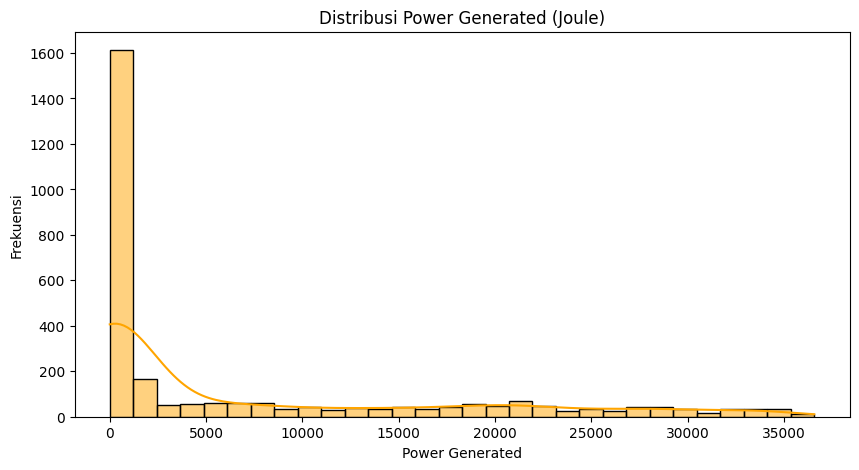

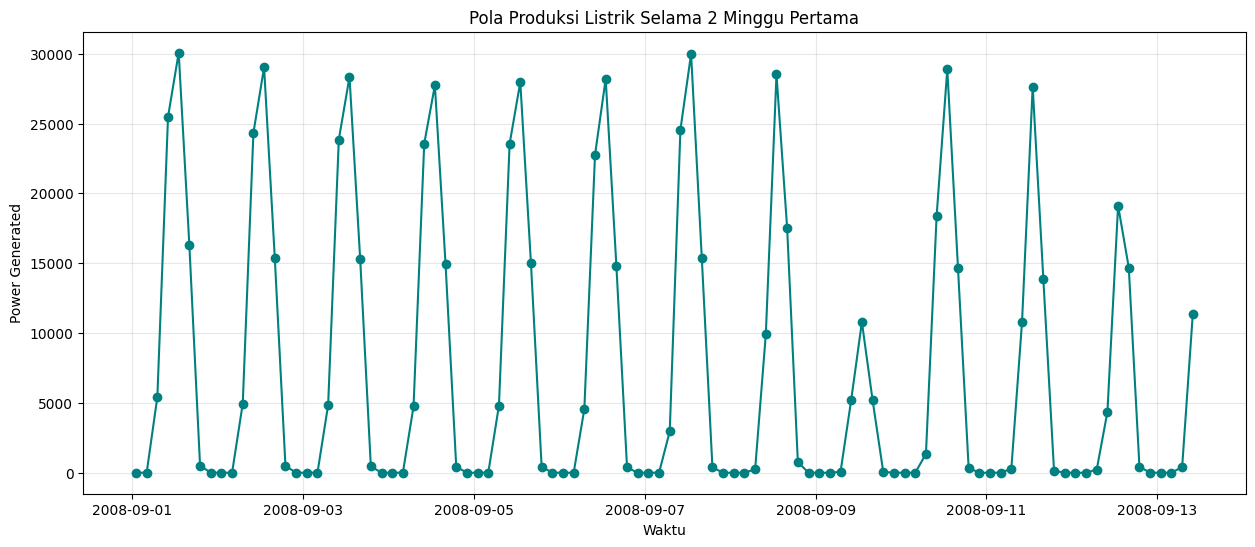

In [4]:
#Sebaran Data
plt.figure(figsize=(10, 5))
sns.histplot(df['Power Generated'], kde=True, bins=30, color='orange')
plt.title('Distribusi Power Generated (Joule)')
plt.xlabel('Power Generated')
plt.ylabel('Frekuensi')
plt.show()

#Pola produksi 
subset = df.head(100) 
plt.figure(figsize=(15, 6))
plt.plot(subset['Datetime'], subset['Power Generated'], marker='o', linestyle='-', color='teal')
plt.title('Pola Produksi Listrik Selama 2 Minggu Pertama')
plt.xlabel('Waktu')
plt.ylabel('Power Generated')
plt.grid(True, alpha=0.3)
plt.show()



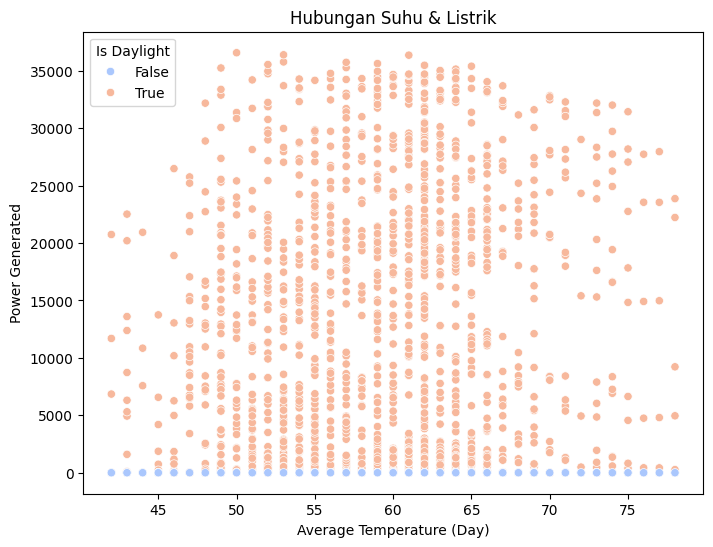

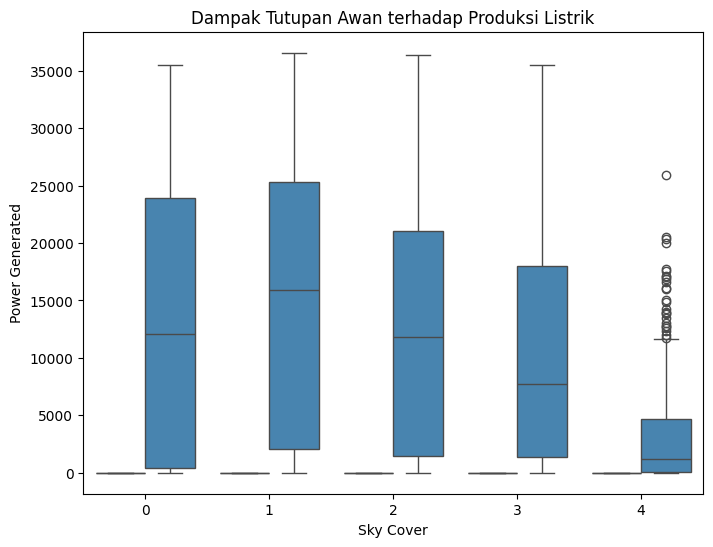

In [5]:
#Hubungan generasi listrik dengan suhu
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Temperature (Day)', y='Power Generated', data=df, hue='Is Daylight', palette='coolwarm')
plt.title('Hubungan Suhu & Listrik')
plt.show()

#hubungan generasi listrik dengan awan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sky Cover', y='Power Generated', data=df, palette='Blues',hue='Is Daylight', legend=False )
plt.title('Dampak Tutupan Awan terhadap Produksi Listrik')
plt.show()

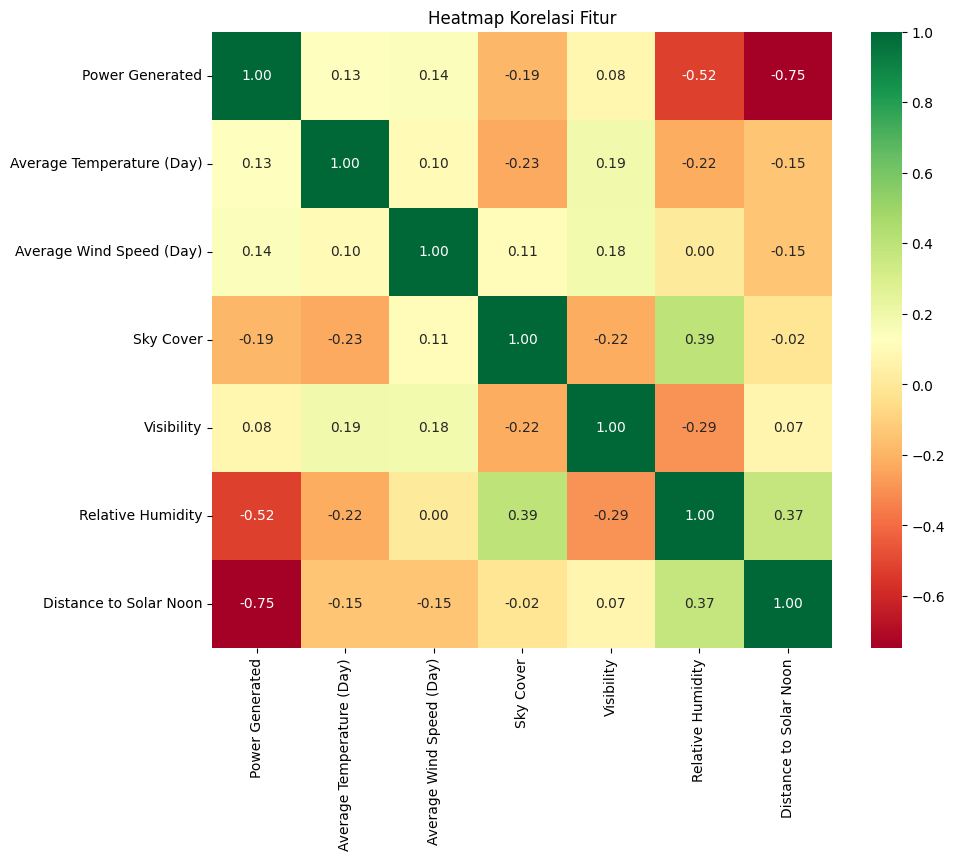

In [6]:
#Korelasi antar fitur
cols_corr = ['Power Generated', 'Average Temperature (Day)', 'Average Wind Speed (Day)', 
             'Sky Cover', 'Visibility', 'Relative Humidity', 'Distance to Solar Noon']
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_corr].corr(), annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
#Penggabungan waktu
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) + \
                     pd.to_timedelta(df['First Hour of Period'], unit='h')
    
df = df.sort_values('Datetime').reset_index(drop=True)
    
#Renaming & Casting
df = df.rename(columns={
        'Power Generated': 'Target_Power',
        'Average Temperature (Day)': 'Temp',
        'Average Wind Speed (Day)': 'WindSpeed',
        'Sky Cover': 'SkyCover',
        'Relative Humidity': 'Humidity',
        'Is Daylight': 'IsDaylight',
        'Visibility': 'Visibility'
    })
    
# Ubah Boolean (True/False) menjadi Integer (1/0)
if df['IsDaylight'].dtype == 'bool':
    df['IsDaylight'] = df['IsDaylight'].astype(int)

# Feature Selection
features = ['Temp', 'WindSpeed', 'SkyCover', 'Visibility', 'Humidity', 'IsDaylight']
target = 'Target_Power'
    
# Validasi kolom (Formalitas: cek apakah kolom benar-benar ada)
missing = [col for col in features + [target] if col not in df.columns]
if missing:
    raise ValueError(f"Kolom hilang: {missing}")
    
X = df[features]
y = df[[target]]
    
# Splitting Data (Sequential Split)
train_size = int(len(df) * 0.8)
    
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]
    
    
# Scaling (MinMax)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
    
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
    
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

df.to_csv('powergeneration_preprocess.csv', index=False)

In [8]:
#Save Train Data
df_train_final = pd.DataFrame(X_train_scaled, columns=features)
df_train_final['Target_Power'] = y_train_scaled.flatten()
df_train_final.to_csv('data_train_scaled.csv', index=False)

#Save Test Data
df_test_final = pd.DataFrame(X_test_scaled, columns=features)
df_test_final['Target_Power'] = y_test_scaled.flatten()
df_test_final.to_csv('data_test_scaled.csv', index=False)

In [ ]:
import joblib
joblib.dump(scaler_y, 'scaler_y.pkl') 

Scaler berhasil disimpan sebagai scaler_y.pkl
